# Gann Lines and Angles Indicator

https://www.investoo.com/indicators-gann-lines-and-angles/

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D  
import matplotlib.lines as mlines
import matplotlib.transforms as mtransforms

import warnings
warnings.filterwarnings("ignore")

# fix_yahoo_finance is used to fetch data 
import yfinance as yf
yf.pdr_override()

In [2]:
# input
symbol = 'LT.NS'
start = '2020-01-01'
end = '2023-01-01'

# Read data 
df = yf.download(symbol,start,end)

# View Columns
df.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-01 00:00:00+05:30,1308.400024,1318.900024,1303.000000,1309.949951,1226.583984,3123998
2020-01-02 00:00:00+05:30,1312.000000,1348.000000,1311.000000,1345.300049,1259.684448,4335359
2020-01-03 00:00:00+05:30,1344.949951,1344.949951,1330.150024,1335.050049,1250.086548,2059871
2020-01-06 00:00:00+05:30,1331.000000,1332.000000,1314.099976,1316.750000,1232.951172,2646905
2020-01-07 00:00:00+05:30,1328.000000,1339.500000,1313.750000,1320.500000,1236.462646,2077893


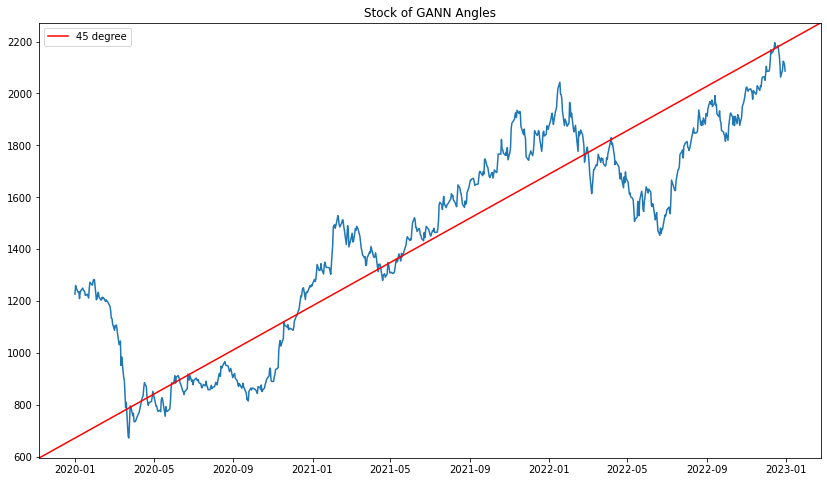

In [3]:
# Line Chart
plt.figure(figsize=(14,8))
plt.plot(df['Adj Close'])
y_lim = plt.ylim()
x_lim = plt.xlim()
plt.plot(x_lim, y_lim, 'k-', color = 'r', label='45 degree')
plt.ylim(y_lim)
plt.xlim(x_lim)
plt.title('Stock of GANN Angles')
plt.legend(loc='best')
plt.show()

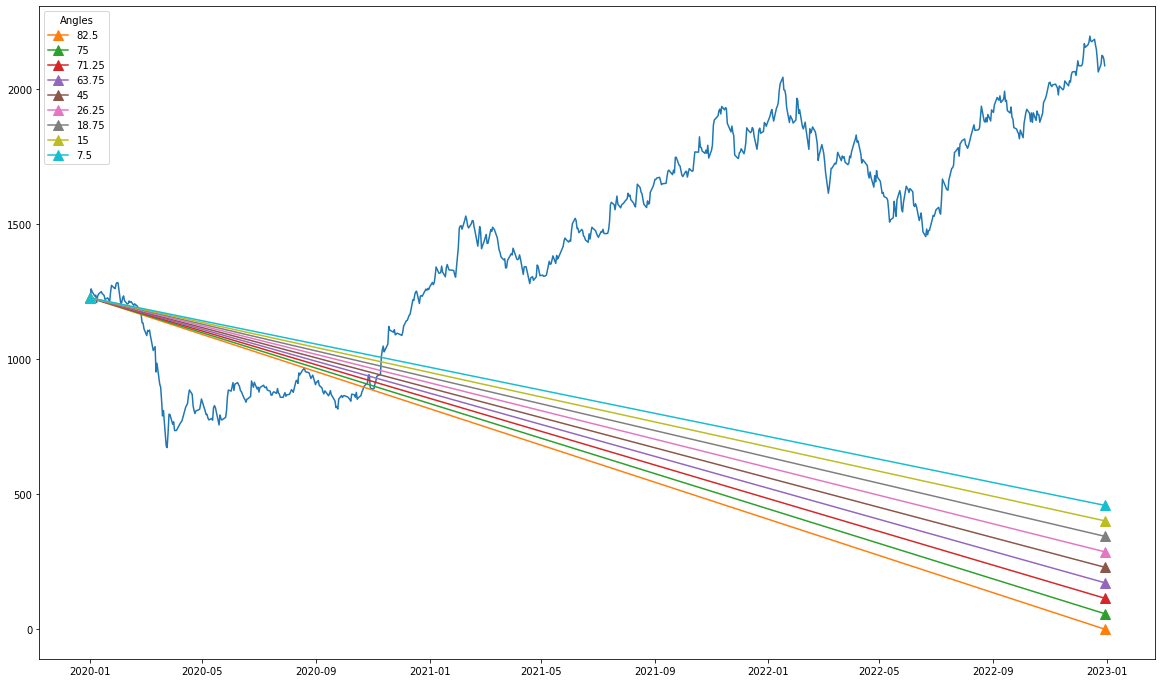

In [4]:
import math

angles = [82.5,75,71.25,63.75,45,26.25,18.75,15,7.5]
# radians = [0,7.5,15,18.5,26.25,45,63.75,71.25,75,82.5,90]
radians = [0.1309,0.261799,0.3228859,0.45814893,0.785398,1.1126474,1.2435471,1.309,1.439897]
# math.degrees(angles)
fig, ax = plt.subplots(figsize=(20,12))
ax.plot(df.index, df['Adj Close'])

x_0 = 0
y_0 = 0  


for i in range(len(radians)):
    ax.plot([df.index[0], df.index[-1]], [df['Adj Close'][0], math.degrees(math.radians(i)*(180/math.pi))], marker='^', markersize=10, label=angles[i])
    #ax.plot([df.index[0], df.index[-1]], [df['Adj Close'][0], math.degrees(i)], marker='^', markersize=10, label=angles[i])

plt.legend(title="Angles")
plt.show()

## Candlestick with GANN Lines Angles

In [5]:
from matplotlib import dates as mdates
import datetime as dt


df['VolumePositive'] = df['Open'] < df['Adj Close']
dfc = df.dropna()
dfc = df.reset_index()
dfc['Date'] = pd.to_datetime(dfc['Date'])
dfc['Date'] = dfc['Date'].apply(mdates.date2num)
dfc.head()

,Date,Open,High,Low,Close,Adj Close,Volume,VolumePositive
0,18261.770833,1308.400024,1318.900024,1303.000000,1309.949951,1226.583984,3123998,False
1,18262.770833,1312.000000,1348.000000,1311.000000,1345.300049,1259.684448,4335359,False
2,18263.770833,1344.949951,1344.949951,1330.150024,1335.050049,1250.086548,2059871,False
3,18266.770833,1331.000000,1332.000000,1314.099976,1316.750000,1232.951172,2646905,False
4,18267.770833,1328.000000,1339.500000,1313.750000,1320.500000,1236.462646,2077893,False


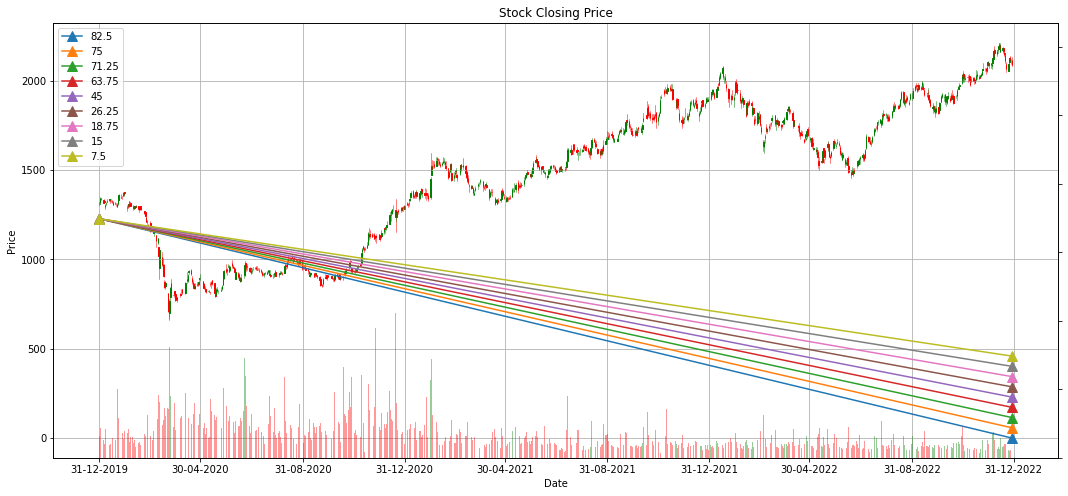

In [7]:
from mpl_finance import candlestick_ohlc

# Plot Example Angle line
angles = [82.5,75,71.25,63.75,45,26.25,18.75,15,7.5]

# plot the points
fig = plt.figure(figsize=(18,8))
ax = plt.subplot(111)

candlestick_ohlc(ax,dfc.values, width=0.5, colorup='g', colordown='r', alpha=1.0)
ax.xaxis_date()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
x_0 = 0
y_0 = 0  


for i in range(len(angles)):
    ax.plot([df.index[0], df.index[-1]], [df['Adj Close'][0], math.degrees(math.radians(i)*(180/math.pi))], marker='^', markersize=10, label=angles[i])
    
axv = ax.twinx()
colors = df.VolumePositive.map({True: 'g', False: 'r'})
axv.bar(dfc.Date, dfc['Volume'], color=colors, alpha=0.4)
axv.axes.yaxis.set_ticklabels([])
axv.set_ylim(0, 3*dfc.Volume.max())
ax.grid(True)
ax.set_title('Stock Closing Price')
ax.set_ylabel('Price')
ax.set_xlabel('Date')
ax.legend(loc='best')